# Applied Machine Learining Final Project

*Predictive Modeling on Diabetes Dataset*

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [8]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

### View Data

In [9]:
df.head(12672)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
12667,Female,54.0,0,0,ever,43.54,6.6,260,1
12668,Female,22.0,0,0,current,30.63,6.2,130,0
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
12670,Female,24.0,0,0,never,21.22,5.8,155,0


### Clean the Data

In [10]:
# check values in columns

print('\nUnique values in gender:', df['gender'].unique())
print('\nUnique values in hypertension:', df['hypertension'].unique())
print('\nUnique values in heart_disease:', df['heart_disease'].unique())
print('\nUnique values in smoking_history:', df['smoking_history'].unique())
print('\nUnique values in diabetes:', df['diabetes'].unique())


Unique values in gender: ['Female' 'Male' 'Other']

Unique values in hypertension: [0 1]

Unique values in heart_disease: [1 0]

Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

Unique values in diabetes: [0 1]


In [11]:
# remove rows with gender as 'Other'
df = df[(df['gender'] != 'Other')]

# remove rows with smoking_history as 'Unknown'
#df = df[(df['smoking_history'] != 'No Info')]

# fixing typo in smoking_history 'ever' to 'never'
df['smoking_history'] = df['smoking_history'].replace('No Info', 'no_info')

# fixing typo in smoking_history 'ever' to 'never'
df['smoking_history'] = df['smoking_history'].replace('ever', 'never')

# change in smoking_history 'not current' to 'former'
df['smoking_history'] = df['smoking_history'].replace('not current', 'former')

In [12]:
# check if changes applied

print('\nUpdated values in gender:', df['gender'].unique())
print('\nUpdated values in smoking_history:', df['smoking_history'].unique())


Updated values in gender: ['Female' 'Male']

Updated values in smoking_history: ['never' 'no_info' 'current' 'former']


### Encoding the data

In [13]:
# import encoder
from sklearn.preprocessing import OneHotEncoder

# encode 'gender' 
gender_encoder = OneHotEncoder(drop='first', sparse_output=False)
gender_encoded = gender_encoder.fit_transform(df[['gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['is_male'])

# encode 'smoking_history'
smoking_encoder = OneHotEncoder(sparse_output=False)
smoking_encoded = smoking_encoder.fit_transform(df[['smoking_history']])
smoking_encoded_df = pd.DataFrame(smoking_encoded, columns=smoking_encoder.get_feature_names_out(['smoking_history']))

# merge encoded with the original data
df = df.drop(['gender', 'smoking_history'], axis=1).reset_index(drop=True)
df = pd.concat([gender_encoded_df, smoking_encoded_df, df], axis=1)


In [14]:
print(df.columns)

Index(['is_male', 'smoking_history_current', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_no_info', 'age',
       'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


### To export the processed data

In [ ]:
# df.to_excel('diabetes_dataset_cleaned.xlsx', index=False)

### Extract the variables

In [15]:
X = df.drop('diabetes', axis=1).values # features, all columns except 'diabetes'
y = df['diabetes'].values              # target variable

### Split the dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define models

In [18]:
# import the model libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# dictionary
models = {
    "SVM - Linear": SVC(kernel = 'linear', random_state = 0),
    "SVM - Polynomial": SVC(kernel = 'poly', random_state = 0),
    "SVM - Sigmoid": SVC(kernel = 'sigmoid', random_state = 0),
    "SVM - Radial Basis Function": SVC(kernel = 'rbf', random_state = 0),
    "Logistic Regression": LogisticRegression(random_state= 0),
    "Random Forest - Entropy": RandomForestClassifier(n_estimators= 12, criterion= 'entropy', random_state = 0),
    "Random Forest - Gini": RandomForestClassifier(n_estimators= 12, criterion= 'gini', random_state = 0),
    "K-Nearest Neighbors - Manhattan Distance": KNeighborsClassifier(n_neighbors = 5, p = 1),
    "K-Nearest Neighbors - Euclidean Distance": KNeighborsClassifier(n_neighbors = 5, p = 2)
}

### Train models and compare

Using 70/30 training testing split

70/30 Split Metrics

SVM - Linear Accuracy: 96.10 %
SVM - Linear Recall: 58.95 %
SVM - Linear Precision: 92.75 %
SVM - Linear F1 Score: 72.08 %
Confusion Matrix for SVM - Linear:


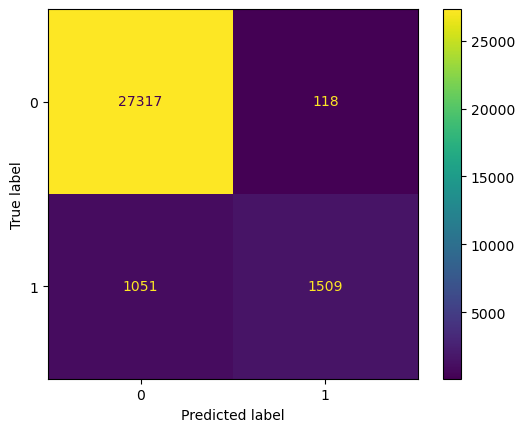

SVM - Polynomial Accuracy: 96.41 %
SVM - Polynomial Recall: 59.02 %
SVM - Polynomial Precision: 98.24 %
SVM - Polynomial F1 Score: 73.74 %
Confusion Matrix for SVM - Polynomial:


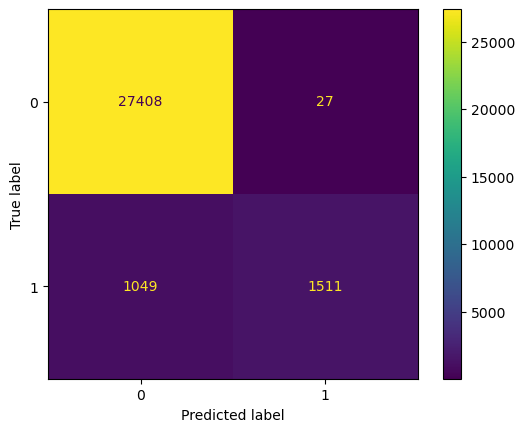

SVM - Sigmoid Accuracy: 92.09 %
SVM - Sigmoid Recall: 54.10 %
SVM - Sigmoid Precision: 53.62 %
SVM - Sigmoid F1 Score: 53.86 %
Confusion Matrix for SVM - Sigmoid:


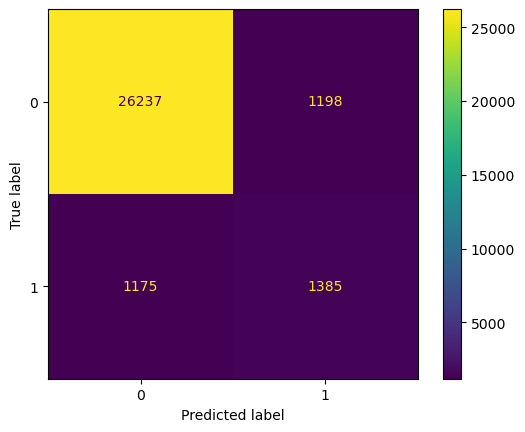

SVM - Radial Basis Function Accuracy: 96.31 %
SVM - Radial Basis Function Recall: 58.36 %
SVM - Radial Basis Function Precision: 97.33 %
SVM - Radial Basis Function F1 Score: 72.97 %
Confusion Matrix for SVM - Radial Basis Function:


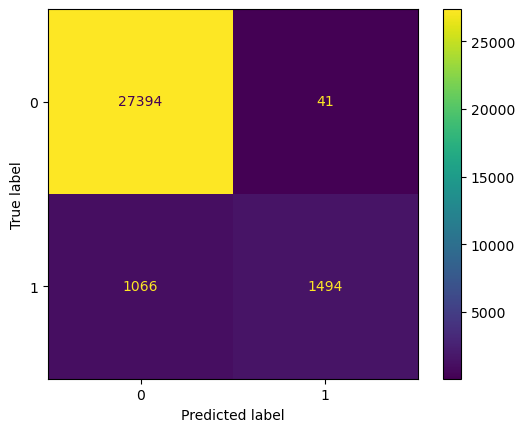

Logistic Regression Accuracy: 96.04 %
Logistic Regression Recall: 62.85 %
Logistic Regression Precision: 87.11 %
Logistic Regression F1 Score: 73.02 %
Confusion Matrix for Logistic Regression:


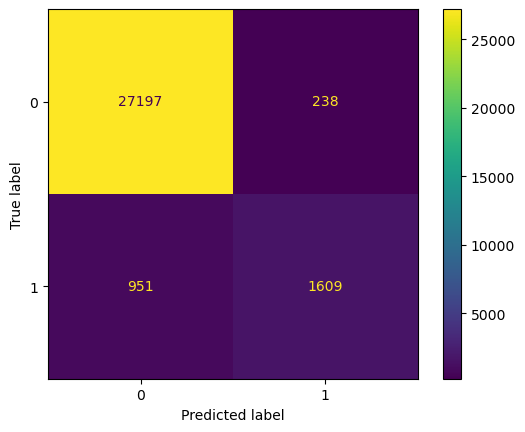

Random Forest - Entropy Accuracy: 96.91 %
Random Forest - Entropy Recall: 68.75 %
Random Forest - Entropy Precision: 93.22 %
Random Forest - Entropy F1 Score: 79.14 %
Confusion Matrix for Random Forest - Entropy:


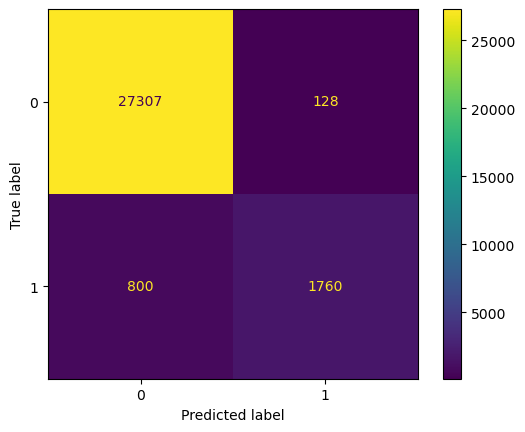

Random Forest - Gini Accuracy: 96.95 %
Random Forest - Gini Recall: 68.95 %
Random Forest - Gini Precision: 93.68 %
Random Forest - Gini F1 Score: 79.43 %
Confusion Matrix for Random Forest - Gini:


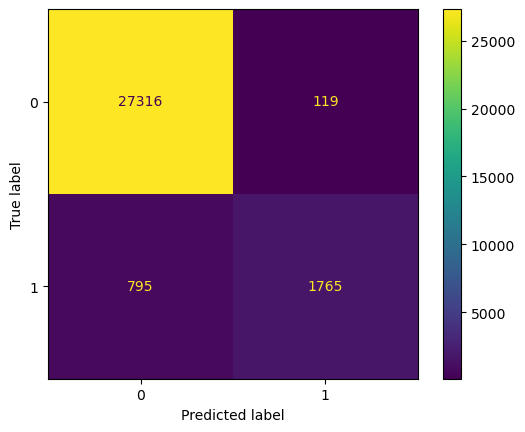

K-Nearest Neighbors - Manhattan Distance Accuracy: 96.18 %
K-Nearest Neighbors - Manhattan Distance Recall: 62.34 %
K-Nearest Neighbors - Manhattan Distance Precision: 89.76 %
K-Nearest Neighbors - Manhattan Distance F1 Score: 73.58 %
Confusion Matrix for K-Nearest Neighbors - Manhattan Distance:


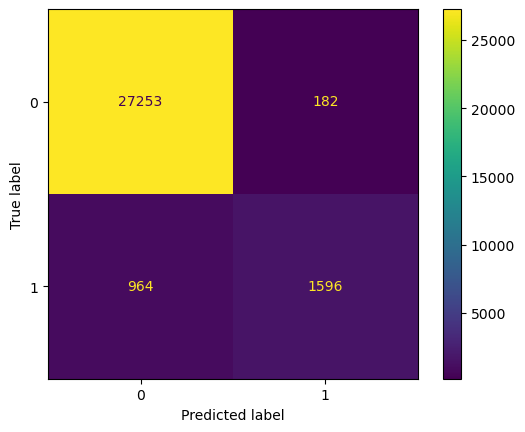

K-Nearest Neighbors - Euclidean Distance Accuracy: 96.23 %
K-Nearest Neighbors - Euclidean Distance Recall: 63.01 %
K-Nearest Neighbors - Euclidean Distance Precision: 89.71 %
K-Nearest Neighbors - Euclidean Distance F1 Score: 74.02 %
Confusion Matrix for K-Nearest Neighbors - Euclidean Distance:


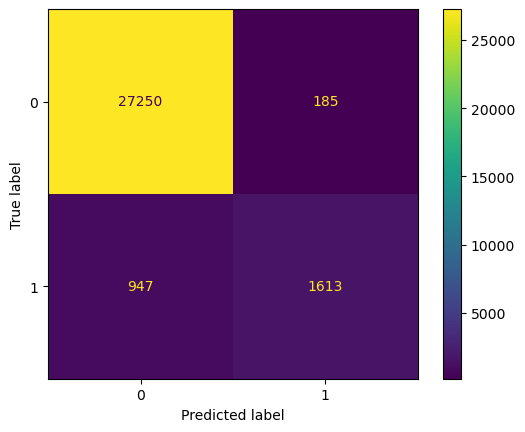

In [19]:
print("70/30 Split Metrics\n")

acc70_30 = []
recall70_30 = []
prec70_30 = []
f170_30 = []

for name, model in models.items():
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict on the test set
    acc = accuracy_score(y_test, y_pred) # accuracy score
    recall = recall_score(y_test, y_pred) # recall score
    precision = precision_score(y_test, y_pred) # precision score
    f1 = f1_score(y_test, y_pred) # f1 score
    print(f"{name} Accuracy: {100*acc:.2f} %") # print accuracy
    print(f"{name} Recall: {100*recall:.2f} %") # print recall score
    print(f"{name} Precision: {100*precision:.2f} %") # print precision score
    print(f"{name} F1 Score: {100*f1:.2f} %") # print f1 score
    cm = (confusion_matrix(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    print(f"Confusion Matrix for {name}:") # print confusion matrix
    disp.plot()
    plt.show()

    
    acc70_30.append((name, acc*100))
    recall70_30.append((name, recall*100))
    prec70_30.append((name, precision*100))
    f170_30.append((name, f1*100))

Plot the metrics of 70/30 split

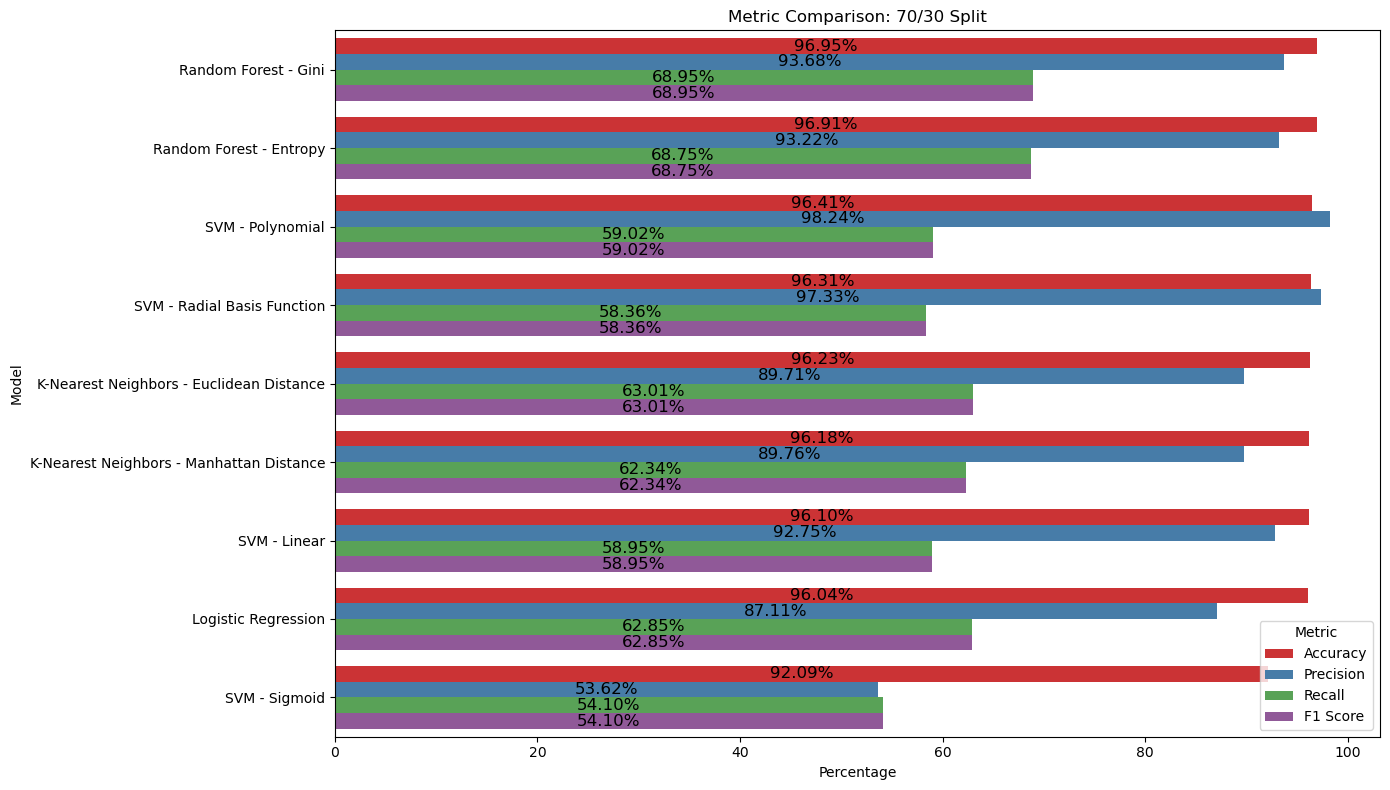

In [20]:
import pandas as pd
import seaborn as sns

acc70_30.sort(key=lambda x: x[1], reverse=True) # sort by accuracy (greatest to least)

dfacc_70 = pd.DataFrame(acc70_30, columns=["Model", "Percentage"]) # create DataFrame
dfacc_70["Metric"] = "Accuracy" # add metric column

dfrec_70 = pd.DataFrame(recall70_30, columns=["Model", "Percentage"])
dfrec_70["Metric"] = "Recall"

dfpre_70 = pd.DataFrame(prec70_30, columns=["Model", "Percentage"])
dfpre_70["Metric"] = "Precision" 

df1_70 = pd.DataFrame(recall70_30, columns=["Model", "Percentage"])
df1_70["Metric"] = "F1 Score" 

combined_df = pd.concat([dfacc_70,dfpre_70, dfrec_70, df1_70]) # combine the DataFrames

# create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Percentage", y="Model", hue="Metric", palette="Set1")

# add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=12)

# Plot format
plt.title("Metric Comparison: 70/30 Split")
plt.xlabel("Percentage")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Using 80/20 training testing split

80/20 Split Metrics

SVM - Linear Accuracy: 96.20 %
SVM - Linear Recall: 59.78 %
SVM - Linear Precision: 93.41 %
SVM - Linear F1 Score: 72.90 %
Confusion Matrix for SVM - Linear:


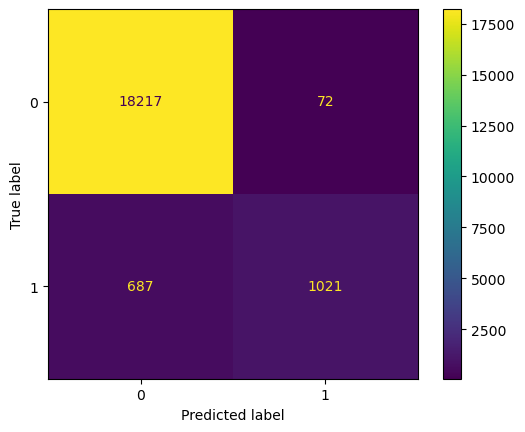

SVM - Polynomial Accuracy: 96.45 %
SVM - Polynomial Recall: 59.60 %
SVM - Polynomial Precision: 98.07 %
SVM - Polynomial F1 Score: 74.14 %
Confusion Matrix for SVM - Polynomial:


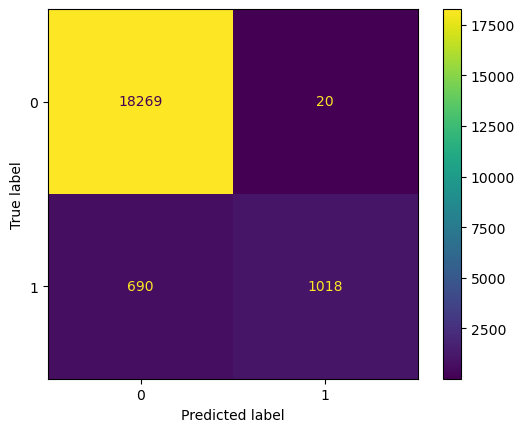

SVM - Sigmoid Accuracy: 91.82 %
SVM - Sigmoid Recall: 51.70 %
SVM - Sigmoid Precision: 52.16 %
SVM - Sigmoid F1 Score: 51.93 %
Confusion Matrix for SVM - Sigmoid:


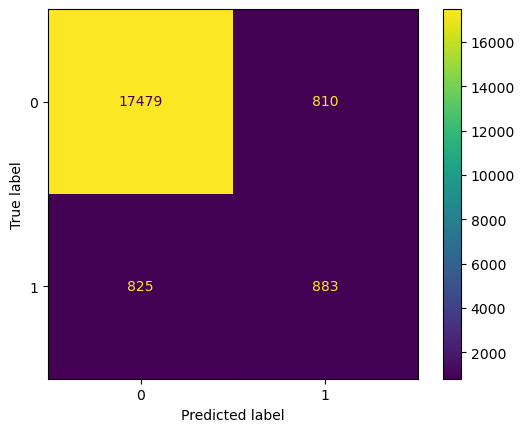

SVM - Radial Basis Function Accuracy: 96.36 %
SVM - Radial Basis Function Recall: 58.90 %
SVM - Radial Basis Function Precision: 97.58 %
SVM - Radial Basis Function F1 Score: 73.46 %
Confusion Matrix for SVM - Radial Basis Function:


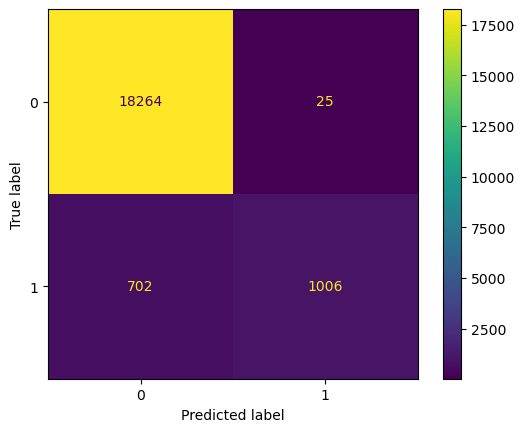

Logistic Regression Accuracy: 96.14 %
Logistic Regression Recall: 63.99 %
Logistic Regression Precision: 87.44 %
Logistic Regression F1 Score: 73.90 %
Confusion Matrix for Logistic Regression:


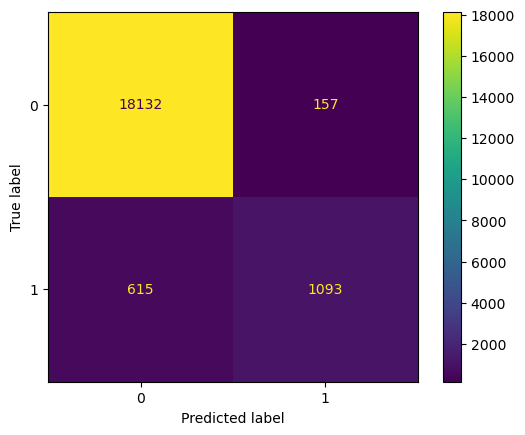

Random Forest - Entropy Accuracy: 96.93 %
Random Forest - Entropy Recall: 69.61 %
Random Forest - Entropy Precision: 92.67 %
Random Forest - Entropy F1 Score: 79.51 %
Confusion Matrix for Random Forest - Entropy:


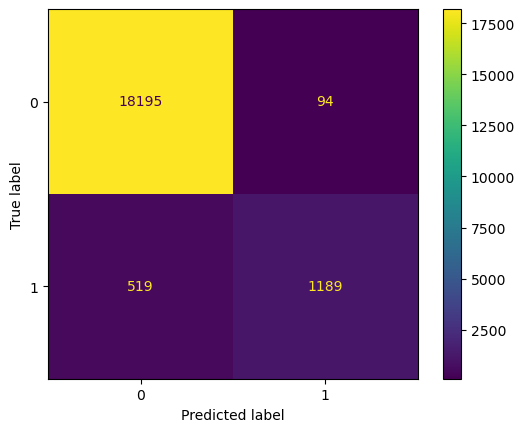

Random Forest - Gini Accuracy: 96.95 %
Random Forest - Gini Recall: 69.09 %
Random Forest - Gini Precision: 93.50 %
Random Forest - Gini F1 Score: 79.46 %
Confusion Matrix for Random Forest - Gini:


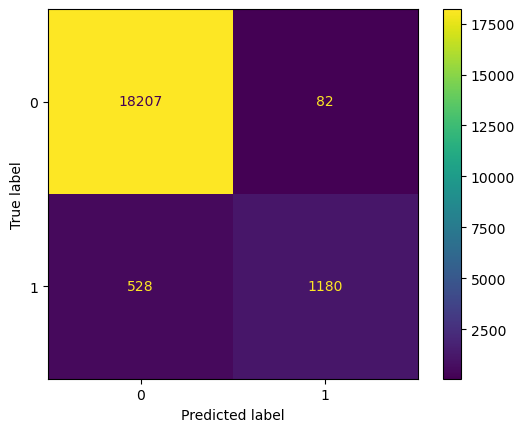

K-Nearest Neighbors - Manhattan Distance Accuracy: 96.26 %
K-Nearest Neighbors - Manhattan Distance Recall: 63.58 %
K-Nearest Neighbors - Manhattan Distance Precision: 89.68 %
K-Nearest Neighbors - Manhattan Distance F1 Score: 74.41 %
Confusion Matrix for K-Nearest Neighbors - Manhattan Distance:


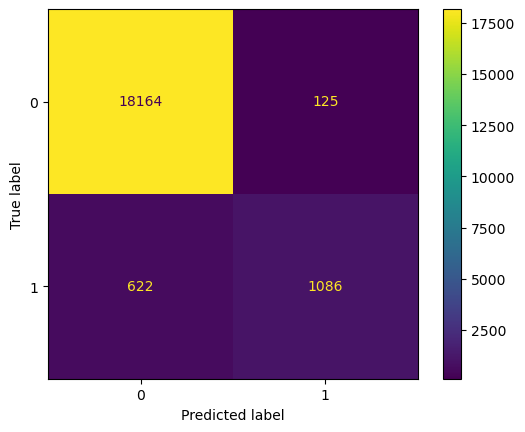

K-Nearest Neighbors - Euclidean Distance Accuracy: 96.28 %
K-Nearest Neighbors - Euclidean Distance Recall: 63.70 %
K-Nearest Neighbors - Euclidean Distance Precision: 89.77 %
K-Nearest Neighbors - Euclidean Distance F1 Score: 74.52 %
Confusion Matrix for K-Nearest Neighbors - Euclidean Distance:


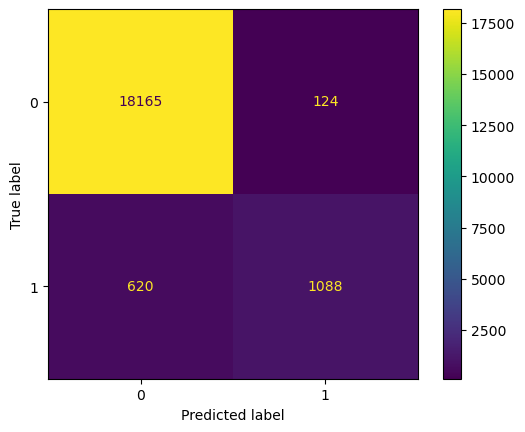

In [21]:
# 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("80/20 Split Metrics\n")

acc80_20 = []
recall80_20 = []
prec80_20 = []
f180_20 = []

for name, model in models.items():
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # predict on the test set
    acc = accuracy_score(y_test, y_pred) # accuracy score
    recall = recall_score(y_test, y_pred) # recall score
    precision = precision_score(y_test, y_pred) # precision score
    f1 = f1_score(y_test, y_pred) # f1 score
    print(f"{name} Accuracy: {100*acc:.2f} %") # print accuracy
    print(f"{name} Recall: {100*recall:.2f} %") # print recall score
    print(f"{name} Precision: {100*precision:.2f} %") # print precision score
    print(f"{name} F1 Score: {100*f1:.2f} %") # print f1 score
    cm = (confusion_matrix(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    print(f"Confusion Matrix for {name}:") # print confusion matrix
    disp.plot()
    plt.show()

    acc80_20.append((name, acc*100))
    recall80_20.append((name, recall*100))
    prec80_20.append((name, precision*100))
    f180_20.append((name, f1*100))

Plot the metrics of  80/20 split

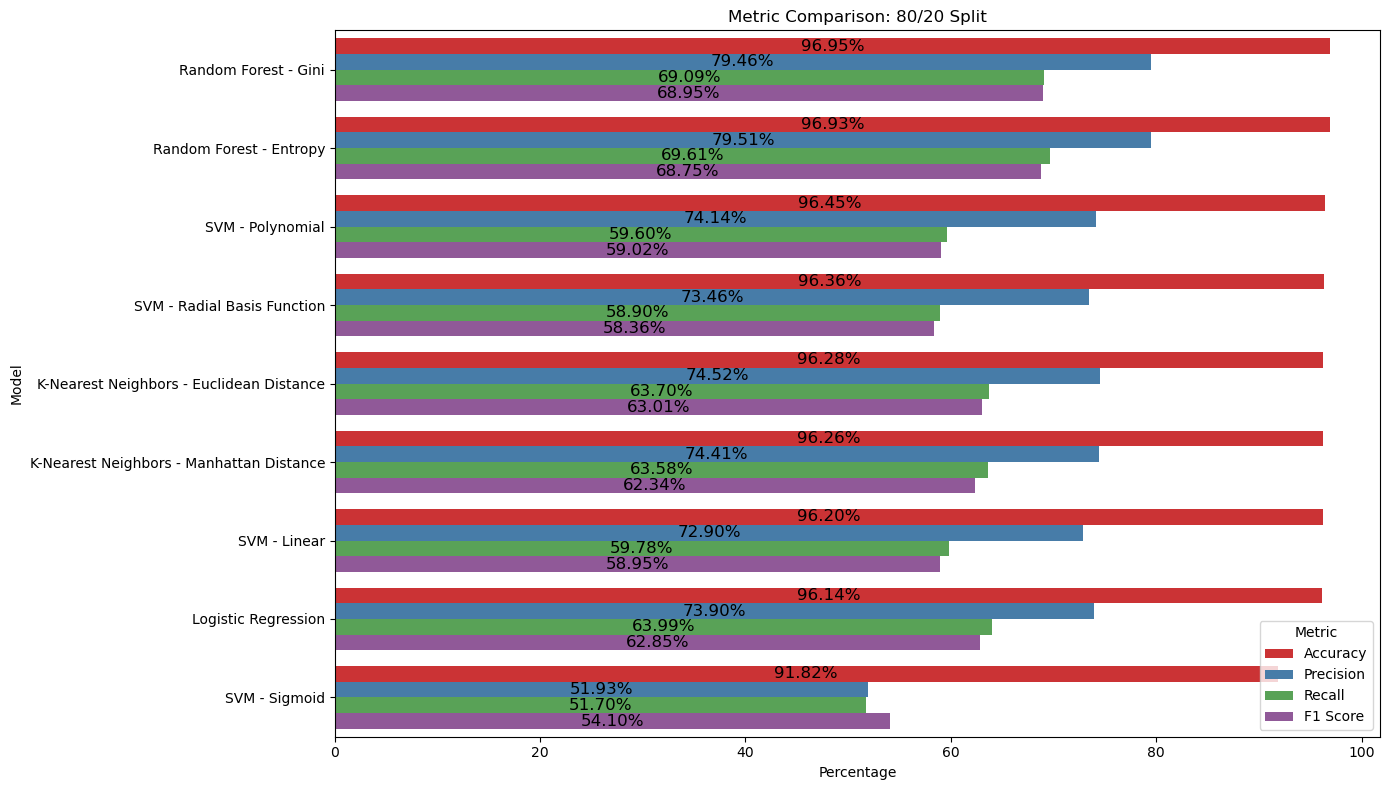

In [22]:
import pandas as pd
import seaborn as sns

acc80_20.sort(key=lambda x: x[1], reverse=True) # sort by accuracy (greatest to least)

dfacc_80 = pd.DataFrame(acc80_20, columns=["Model", "Percentage"]) # create DataFrame
dfacc_80["Metric"] = "Accuracy" #  add metric column

dfrec_80 = pd.DataFrame(recall80_20, columns=["Model", "Percentage"])
dfrec_80["Metric"] = "Recall" 

dfpre_80 = pd.DataFrame(f180_20, columns=["Model", "Percentage"])
dfpre_80["Metric"] = "Precision" 

df1_80 = pd.DataFrame(recall70_30, columns=["Model", "Percentage"])
df1_80["Metric"] = "F1 Score" 

combined_df = pd.concat([dfacc_80, dfpre_80, dfrec_80, df1_80]) # Combine the DataFrames

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Percentage", y="Model", hue="Metric", palette="Set1")

# Add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=12)

# Plot format
plt.title("Metric Comparison: 80/20 Split")
plt.xlabel("Percentage")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### Cross validation

Plot the metrics of cross validation

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# lists to store results
cv_results = []
acc_cv = []
rec_cv = []

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

print("\nCross-Validation Accuracy (5-Fold):\n")

# Evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy') # cross-validation accuracy
    recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall') # cross-validation recall
    mean_acc = scores.mean() * 100 
    std_acc = scores.std() * 100 
    mean_rec = recall.mean() * 100 # mean recall
    cv_results.append((name, mean_acc, std_acc)) # store results
    acc_cv.append((name, mean_acc)) # store accuracy
    rec_cv.append((name, mean_rec)) # store recall
    print(f"{name} --> Accuracy: {mean_acc:.2f}% (+/- {std_acc:.2f}%)") # print accuracy and standard deviation
    print(f"{name} --> Recall: {mean_rec:.2f}%\n") # print recall



Cross-Validation Accuracy (5-Fold):

SVM - Linear --> Accuracy: 96.07% (+/- 0.11%)
SVM - Linear --> Recall: 58.69%

SVM - Polynomial --> Accuracy: 96.39% (+/- 0.10%)
SVM - Polynomial --> Recall: 58.55%

SVM - Sigmoid --> Accuracy: 91.71% (+/- 0.31%)
SVM - Sigmoid --> Recall: 51.12%

SVM - Radial Basis Function --> Accuracy: 96.27% (+/- 0.14%)
SVM - Radial Basis Function --> Recall: 57.74%

Logistic Regression --> Accuracy: 96.01% (+/- 0.16%)
Logistic Regression --> Recall: 62.62%

Random Forest - Entropy --> Accuracy: 96.93% (+/- 0.12%)
Random Forest - Entropy --> Recall: 68.76%

Random Forest - Gini --> Accuracy: 96.93% (+/- 0.09%)
Random Forest - Gini --> Recall: 68.83%

K-Nearest Neighbors - Manhattan Distance --> Accuracy: 96.13% (+/- 0.14%)
K-Nearest Neighbors - Manhattan Distance --> Recall: 61.51%

K-Nearest Neighbors - Euclidean Distance --> Accuracy: 96.08% (+/- 0.12%)
K-Nearest Neighbors - Euclidean Distance --> Recall: 61.96%



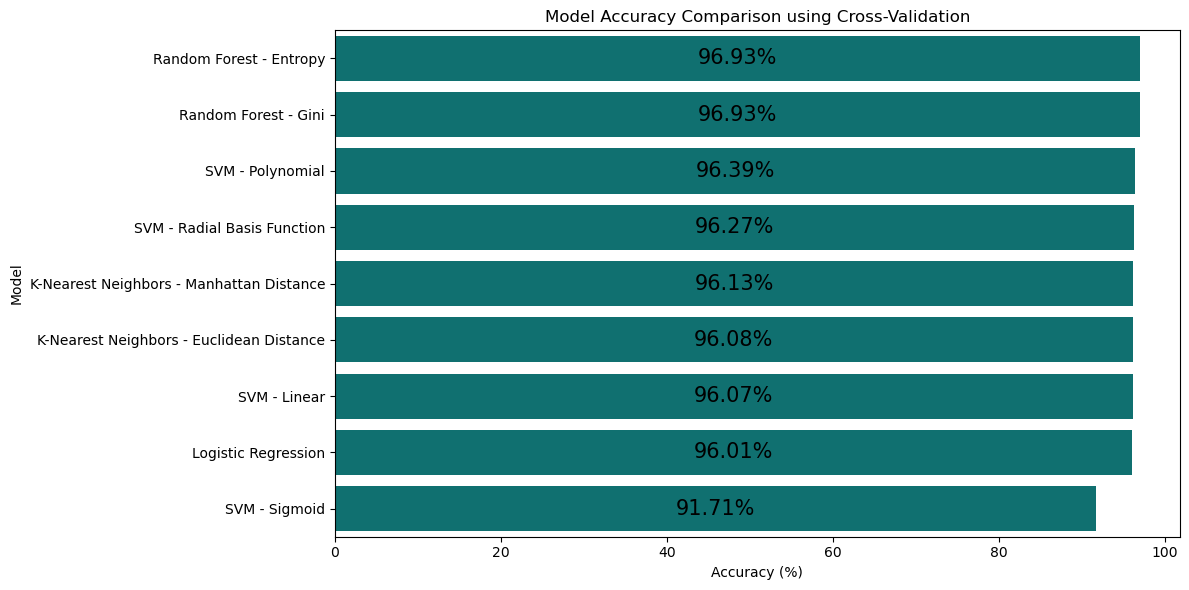

In [24]:
cv_results.sort(key=lambda x: x[1], reverse=True) # sort by accuracy (greatest to least)

cv_results = pd.DataFrame(cv_results, columns=["Model", "Accuracy", "StdDev"]) # create DataFrame


# barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cv_results, y='Model', x='Accuracy', color='teal')

# add percentage inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=15, color='Black')

plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison using Cross-Validation')
plt.tight_layout()
plt.show()

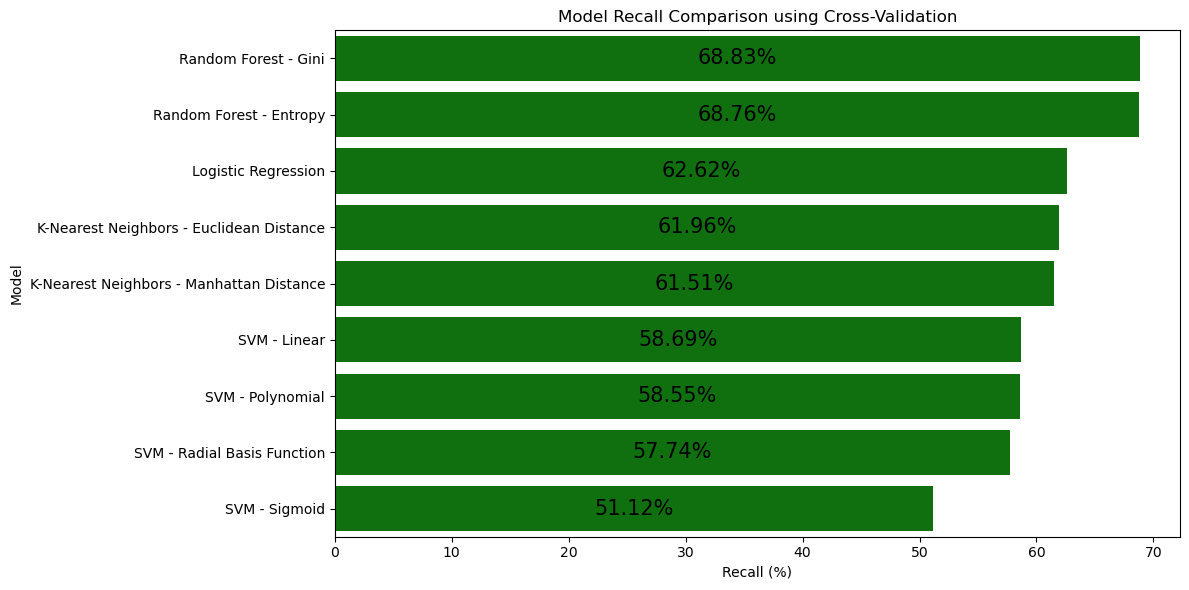

In [25]:
rec_cv.sort(key=lambda x: x[1], reverse=True) # sort by accuracy (greatest to least)
rec_cv = pd.DataFrame(rec_cv, columns=["Model", "Recall"]) # create DataFrame

# barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rec_cv, y='Model', x='Recall', color='green')

# add percentage inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=15, color='Black')

plt.xlabel('Recall (%)')
plt.title('Model Recall Comparison using Cross-Validation')
plt.tight_layout()
plt.show()

### Compare accuracies and recalls of all models across all training methods

In [26]:
acc_cv = pd.DataFrame(acc_cv, columns=["Model", "Accuracy"]) # create DataFrame
acc_cv["Method"] = "Cross Validation" # add split column

dfacc_70 = pd.DataFrame(acc70_30, columns=["Model", "Accuracy"])
dfacc_70["Method"] = "70/30" 

dfacc_80 = pd.DataFrame(acc80_20, columns=["Model", "Accuracy"])
dfacc_80["Method"] = "80/20" 

combined_df = pd.concat([dfacc_70, dfacc_80, acc_cv]) # combine the DataFrames


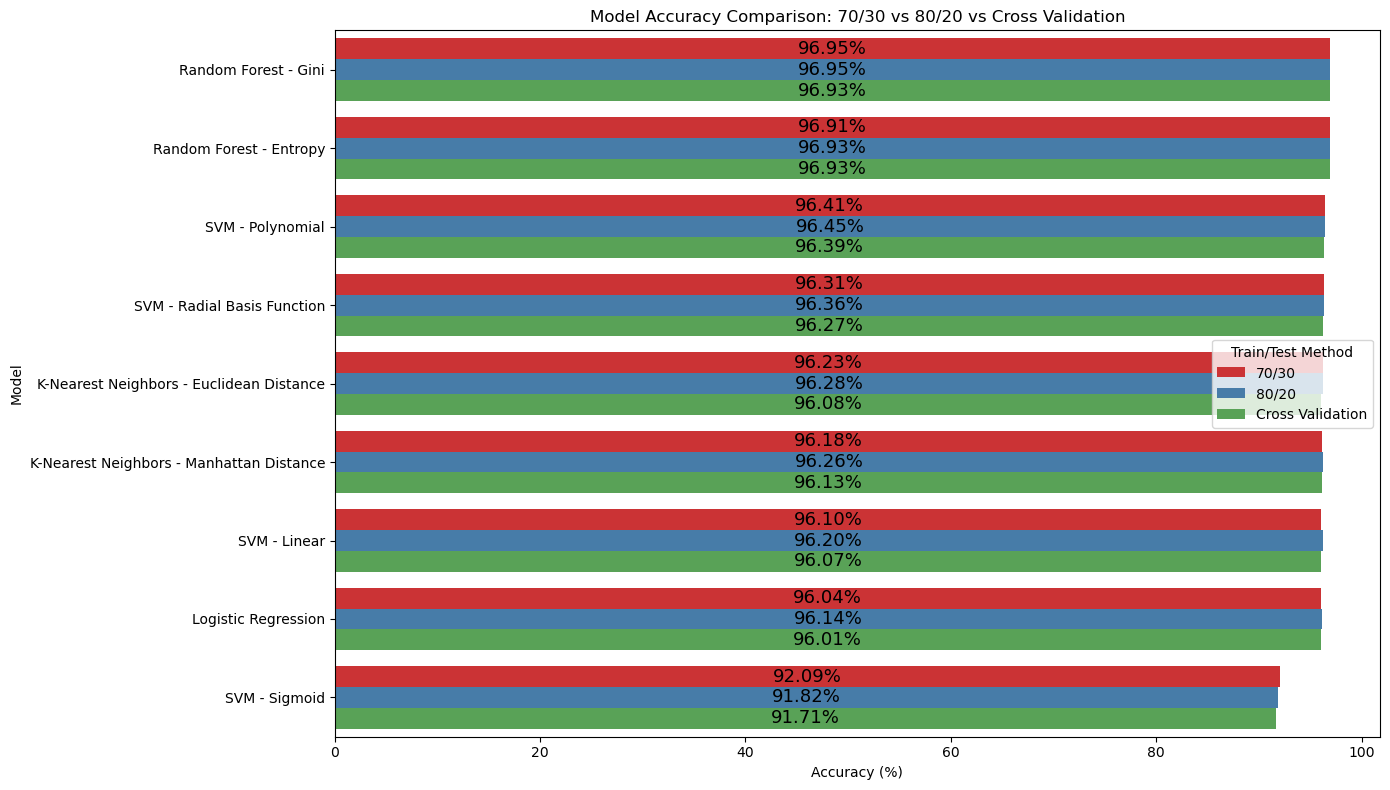

In [27]:
# create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Accuracy", y="Model", hue="Method", palette="Set1")

# add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=13)

# plot format
plt.title("Model Accuracy Comparison: 70/30 vs 80/20 vs Cross Validation")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.legend(title="Train/Test Method")
plt.tight_layout()
plt.show()

In [30]:
rec_cv = pd.DataFrame(rec_cv, columns=["Model", "Recall"]) # create DataFrame
rec_cv["Method"] = "Cross Validation" # add method column

dfrec_70 = pd.DataFrame(recall70_30, columns=["Model", "Recall"])
dfrec_70["Method"] = "70/30" 

dfrec_80 = pd.DataFrame(recall80_20, columns=["Model", "Recall"])
dfrec_80["Method"] = "80/20" 

combined_df = pd.concat([dfrec_70, dfrec_80, rec_cv]) # combine the DataFrames
combined_df = combined_df.sort_values(by="Recall", ascending=False) # sort by recall (greatest to least)


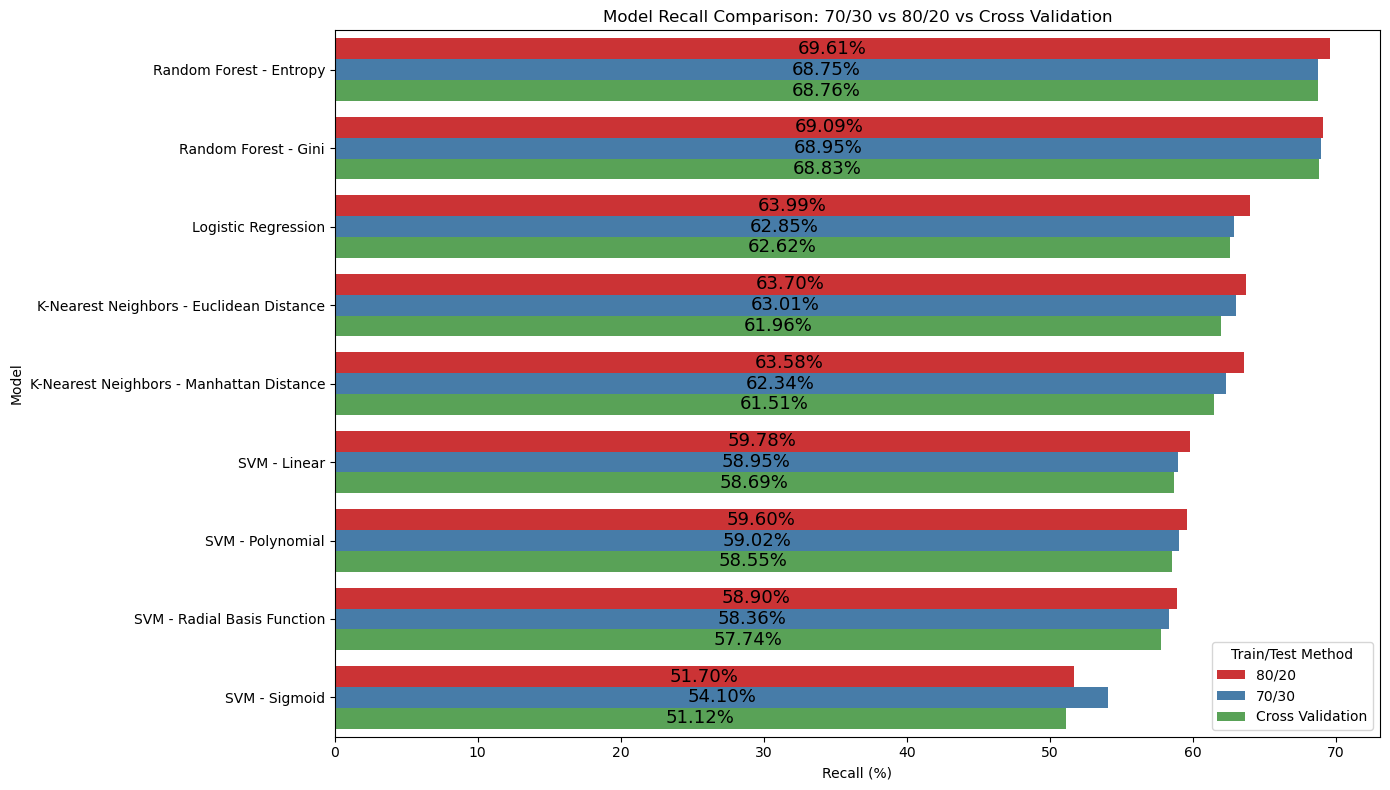

In [31]:
# create the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_df, x="Recall", y="Model", hue="Method", palette="Set1")

# add percentage labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', padding=0, fontsize=13)

# plot format
plt.title("Model Recall Comparison: 70/30 vs 80/20 vs Cross Validation")
plt.xlabel("Recall (%)")
plt.ylabel("Model")
plt.legend(title="Train/Test Method")
plt.tight_layout()
plt.show()

### Testing best model on fake data

In [32]:
# check columns in the DataFrame
print("\nColumns in the DataFrame:")
print(df.columns)


Columns in the DataFrame:
Index(['is_male', 'smoking_history_current', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_no_info', 'age',
       'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [33]:
# example test samples 
sample1 = [[1, 1, 0, 0, 0, 45, 0, 0, 35, 8, 200]]  
sample2 = [[0, 0, 0, 1, 0, 21, 0, 0, 20, 4.0, 90]] 
sample3 = [[0, 0, 1, 0, 0, 55, 1, 1, 30, 5.8, 129]]  
sample4 = [[1, 1, 0, 0, 0, 73, 0, 0, 24, 5.0, 118]]  
sample5 = [[1, 0, 0, 1, 0, 23, 0, 0, 30, 5.6, 125]]  

#  must match the order of the columns in the DataFrame
# 'is_male', 'smoking_history_current', 'smoking_history_former', 'smoking_history_never', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'

In [34]:
# scaling
sample1_scaled = scaler.transform(sample1)
sample2_scaled = scaler.transform(sample2)
sample3_scaled = scaler.transform(sample3)
sample4_scaled = scaler.transform(sample4)
sample5_scaled = scaler.transform(sample5)

In [35]:
# use best model for prediction
# Random Forest Entropy 
rf_model = RandomForestClassifier(n_estimators= 12, criterion= 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)
prediction1 = rf_model.predict(sample1_scaled)
prediction2 = rf_model.predict(sample2_scaled)
prediction3 = rf_model.predict(sample3_scaled)
prediction4 = rf_model.predict(sample4_scaled)
prediction5 = rf_model.predict(sample5_scaled)

# result
print("Sample 1 predicted diabetes:", "Diabetic" if prediction1[0] == 1 else "Not Diabetic")
print("Sample 2 predicted diabetes:", "Diabetic" if prediction2[0] == 1 else "Not Diabetic")
print("Sample 3 predicted diabetes:", "Diabetic" if prediction3[0] == 1 else "Not Diabetic")
print("Sample 4 predicted diabetes:", "Diabetic" if prediction4[0] == 1 else "Not Diabetic")
print("Sample 5 predicted diabetes:", "Diabetic" if prediction5[0] == 1 else "Not Diabetic")

Sample 1 predicted diabetes: Diabetic
Sample 2 predicted diabetes: Not Diabetic
Sample 3 predicted diabetes: Diabetic
Sample 4 predicted diabetes: Not Diabetic
Sample 5 predicted diabetes: Not Diabetic


# Which feature had the most affect on diabetes?

C:\Users\Musta\AppData\Local\Temp\ipykernel_26524\2019943647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis_r')


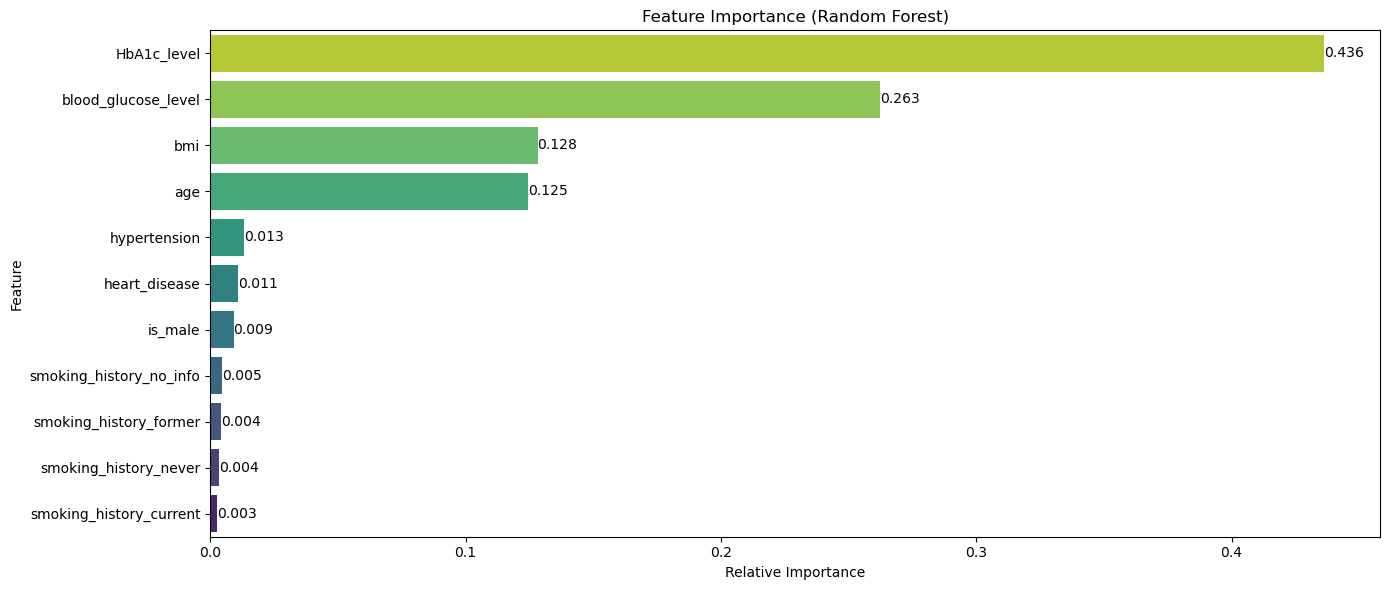

In [45]:
# define feature names 
feature_names = ['is_male', 'smoking_history_current', 'smoking_history_former',
                 'smoking_history_never','smoking_history_no_info', 'age', 'hypertension', 'heart_disease',
                 'bmi', 'HbA1c_level', 'blood_glucose_level']

# feature data frame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(14, 6))
bp = sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis_r')

# add percentage labels on each bar
for container in bp.containers:
    bp.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10)

plt.title('Feature Importance (Random Forest)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()